#### Keras overview

- __tf.keras__ is TensorFlow's implementation of the Keras API specification. 

- a high-level API to build and train models that includes first-class support for TensorFlow-specific functionality, such as eager execution, tf.data pipelines, and Estimators. 

- `tf.keras` makes TensorFlow easier to use without sacrificing flexibility and performance.

In [1]:
#!pip install tensorflow

In [1]:
from IPython.display import Image

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf
from   tensorflow import keras
import keras

from tensorflow.keras.utils import plot_model

In [3]:
tf.__version__

'2.12.0'

In [5]:
keras.__version__

'2.13.1'

#### Models

- In Keras, we assemble __layers__ to build models. A model is (usually) a graph of layers. 

- There are 2 ways to build Keras models: _sequential_ and _functional_.

    - The most common type of model is a stack of layers: __tf.keras.Sequential__ model.

- `Sequential` model

    - simply stack layers sequentially
    - The sequential API allows you to create models layer-by-layer for most problems. It is limited in that it does not allow you to create models that share layers or have multiple inputs or outputs.
    
- `Functional` models

    - functional API allows you to create models that have a lot more flexibility as you can easily define models where layers connect to more than just the previous and next layers. In fact, you can connect layers to (literally) any other layer. As a result, creating complex networks such as siamese networks and residual networks become possible.

#### Layers

Keras __layers__ are the primary building block of Keras models. 

Each __layers__  
- receives input information, 
- do some computation and 
- finally output the transformed information. 

The output of one layer will flow into the next layer as its input. 

Following are the layers in keras
- Input object
- Dense layer (Hidden)
- Activation layer 
- **Embedding layer** - NLP applications
- Masking layer
- Lambda layer

#### Input

In [14]:
from keras.layers import Input 

the number columns the layer will receive

In [15]:
input_tensor = Input(shape=(10,), name='CA housing input')

In [16]:
print(input_tensor)

KerasTensor(type_spec=TensorSpec(shape=(None, 10), dtype=tf.float32, name='CA housing input'), name='CA housing input', description="created by layer 'CA housing input'")


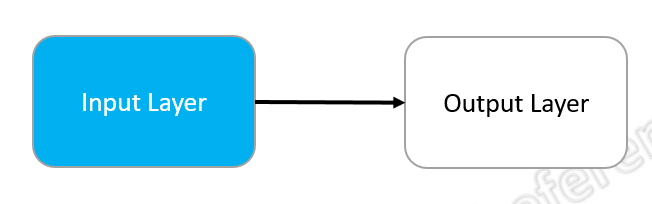

In [14]:
Image(r'S:\AI-icons-images\keras-input-00.PNG', width=400)

#### Outputs

In [17]:
from keras.layers import Dense

In [18]:
output_layer = Dense(5)

output in keras is single dense layer which specifies the shape of the expected output. In this case we expect the model to produce single value so we pass 1 to it

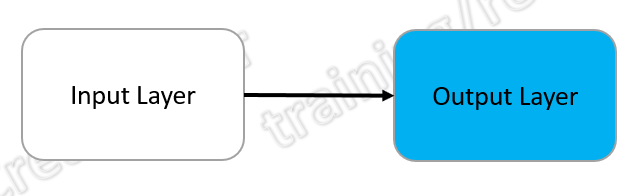

In [32]:
Image(r'S:\AI-icons-images\keras-output-00.PNG', width=400)

In [33]:
print(output_layer)

the output is not a tensor, but a function

#### layers vs tensors
__layers__ are used to define the model whereas the __tensors__ are used to carry the data through the model (layers)

#### connecting the inputs to outputs

In [19]:
input_tensor  = Input(shape=(10,))
output_layer  = Dense(5)

output_tensor = output_layer(input_tensor)

the final output of the model is a tensor

In [35]:
output_tensor

<KerasTensor: shape=(None, 5) dtype=float32 (created by layer 'dense_4')>

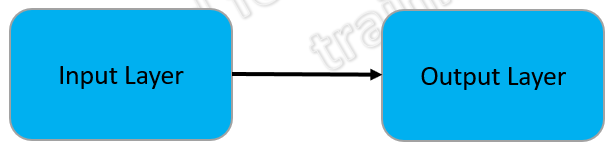

In [36]:
Image(r'S:\AI-icons-images\keras-input-output.PNG', width=400)

alternatively ...

In [20]:
output_tensor = Dense(5)(input_tensor)
output_tensor

<KerasTensor: shape=(None, 5) dtype=float32 (created by layer 'dense_2')>

#### Keras model

In [38]:
from keras.models import Model

In [39]:
model = Model (input_tensor, output_tensor)

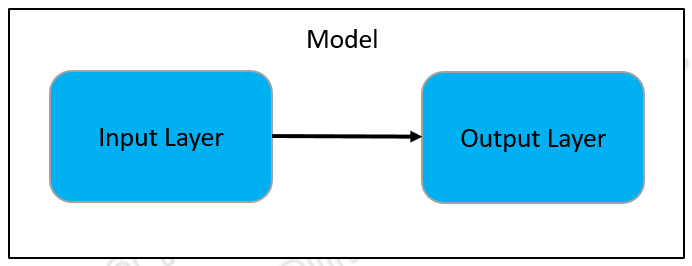

In [40]:
Image(r'S:\AI-icons-images\keras-model.PNG', width=400)

#### Compile the model

Make the model ready for training and predicting

In [41]:
model.compile(optimizer='adam', loss='mean_absolute_error')

#### summarize the model


In [42]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense_5 (Dense)             (None, 5)                 55        
                                                                 
Total params: 55
Trainable params: 55
Non-trainable params: 0
_________________________________________________________________


#### plot the model

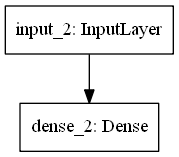

In [28]:
plot_model_better(model, to_file='model.png')

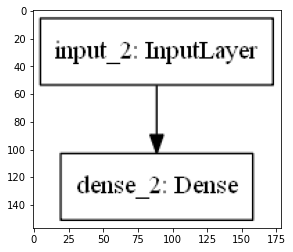

In [29]:
img = plt.imread('model.png')
plt.imshow(img);

## Single input NN

#### Fit and evaluate a model

Objective : Predict game outcomes

Data : team ratings from the orgnizers

In [81]:
import pandas as pd

In [82]:
location = r'D:\MYLEARN\datasets\games_tourney.csv'

In [84]:
data = pd.read_csv(location)
data.shape

(4234, 9)

In [33]:
data.head()

,season,team_1,team_2,home,seed_diff,score_diff,score_1,score_2,won
0,1985,288,73,0,-3,-9,41,50,0
1,1985,5929,73,0,4,6,61,55,1
2,1985,9884,73,0,5,-4,59,63,0
3,1985,73,288,0,3,9,50,41,1
4,1985,3920,410,0,1,-9,54,63,0


input data : 
- X : seed_diff : 
        - difference in team 1 and team 2 seed ranking assigned by the oranizers
        - -15 to +15
        - seed range from 1 - 16
        - Highest difference = 16 -1 =  15
        - lowest difference  = 1 -16 = -15
        
        - seed_diff = 15,  Team 1 = 16, Team 2 = 1    ( Team 1 likely to win)
        - seed_diff = -15, Team 1 = 1,  Team 2 = 16   ( Team 2 likely to win)
        
output data :
- y : score_diff: difference in team scores
        - -50 to +50
        
        - score diff = -9
            - team 1 score = 41
            - team 2 score = 50
        - score diff = 6
            - team 1 score = 61
            - team 2 score = 55

Conclusion:
- positive seed difference is predictive of negative score difference
- and the reverse

D:\ANACONDA1\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\ANACONDA1\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


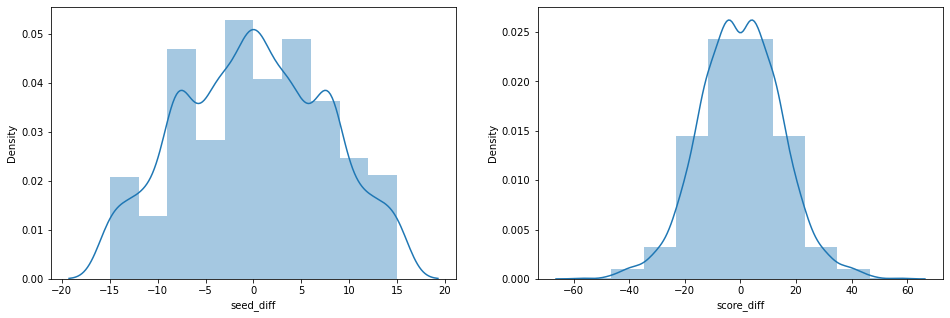

In [85]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

sns.distplot(data.seed_diff,  bins=10, ax=ax1 );
sns.distplot(data.score_diff, bins=10, ax=ax2 );

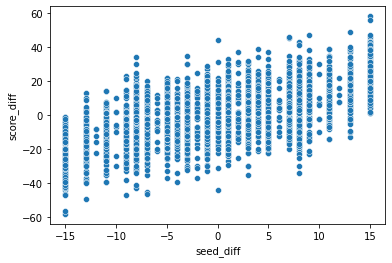

In [86]:
sns.scatterplot(x='seed_diff', y='score_diff', data=data);

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['seed_diff'], data['score_diff'])

#### Fit the model 

- with seed_diff as the input variable and score_diff as the output variable.
- Use 1 epoch, a batch size of 128, and a 10% validation split.

In [89]:
model.fit(X_train, 
          y_train, 
          epochs=10,
          batch_size=128,
          validation_split=.1,
          verbose=True)

Epoch 1/10
23/23 [==============================] - 0s 13ms/step - loss: 12.2420 - val_loss: 12.3271
Epoch 2/10
23/23 [==============================] - 0s 5ms/step - loss: 12.1532 - val_loss: 12.2377
Epoch 3/10
23/23 [==============================] - 0s 4ms/step - loss: 12.0633 - val_loss: 12.1487
Epoch 4/10
23/23 [==============================] - 0s 4ms/step - loss: 11.9762 - val_loss: 12.0631
Epoch 5/10
23/23 [==============================] - 0s 4ms/step - loss: 11.8912 - val_loss: 11.9770
Epoch 6/10
23/23 [==============================] - 0s 4ms/step - loss: 11.8088 - val_loss: 11.8921
Epoch 7/10
23/23 [==============================] - 0s 4ms/step - loss: 11.7267 - val_loss: 11.8080
Epoch 8/10
23/23 [==============================] - 0s 5ms/step - loss: 11.6446 - val_loss: 11.7223
Epoch 9/10
23/23 [==============================] - 0s 4ms/step - loss: 11.5613 - val_loss: 11.6367
Epoch 10/10
23/23 [==============================] - 0s 4ms/step - loss: 11.4786 - val_loss: 11.550

#### Evaluate the model on a test set
After fitting the model, we can evaluate it on new data. 

We will give the model a new X matrix (also called test data), allow it to make predictions, and then compare to the known y variable (also called target data).

In this case, you'll use data from the post-season tournament to evaluate your model. The tournament games happen after the regular season games you used to train our model, and are therefore a good evaluation of how well your model performs out-of-sample.

In [90]:
# Evaluate the model on the test data
model.evaluate(X_test, y_test, verbose=True) 

34/34 [==============================] - 0s 1ms/step - loss: 11.9900


11.98996353149414

---------------------
#### Defining models
---------------------

##### Sequential model

- layers have
    - input 
    - output
    - __input_shape__
    - __output_shape__
- can get weights as list of numpy arrays:
    - __layer.get_weights()__
- set weights 
    - __layer.set_weights(weights)__
- Each layer has a defining configuration
    - __layer.get_config()__
    
`STEPS`

1. Instantiate a Sequential model
2. Add layers to it 1by1 using __add__
3. Compile the model with 
    - A __loss function__    (mandatory)
    - An __optimizer__       (mandatory)
    - __evaluation__ metrics (optional)
4. Use data to fit the model
5. Evaluate the model
6. Optimize
7. Deploy

##### When to use a Sequential model
A Sequential model is appropriate for a __plain stack of layers__ where each layer has exactly one input tensor and one output tensor.

A Sequential model is __not appropriate__ when:

- Your model has multiple inputs or multiple outputs
- Any of your layers has multiple inputs or multiple outputs
- You need to do layer sharing
- You want non-linear topology (e.g. a residual connection, a multi-branch model)

In [5]:
#!pip3 install keras-visualizer

In [6]:
#!pip3 install keras-visualizer

In [22]:
#!pip install pydot

In [7]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import visualkeras
from keras_visualizer import visualizer

from tensorflow.keras.utils import plot_model as plot_model_better
from keras.utils.vis_utils import plot_model

#### method 1

In [26]:
# Define Sequential model with 3 layers
model = tf.keras.Sequential(
                    [
                        # start from the first hidden layer, 
                        # since the input is not actually a layer   
                        # but inform the shape of the input, with 3 elements. 
                        tf.keras.layers.Dense(8, activation="relu", input_shape =(3, ), name="layer-1"),
                        tf.keras.layers.Dense(8, activation="relu", name="layer-2"),
                        tf.keras.layers.Dense(2, name="layer-3"),
                    ]
)

visualkeras.layered_view(model,legend=True, draw_volume=True, scale_xy=10, scale_z=1)

visualizer(model, format='png', view=True) # open image file after visualization

In [28]:
# Call model on a test input
x = tf.ones((5, 3))
x

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [29]:
model(x)

<tf.Tensor: shape=(5, 2), dtype=float32, numpy=
array([[-2.0398762 ,  0.03318206],
       [-2.0398762 ,  0.03318206],
       [-2.0398762 ,  0.03318206],
       [-2.0398762 ,  0.03318206],
       [-2.0398762 ,  0.03318206]], dtype=float32)>

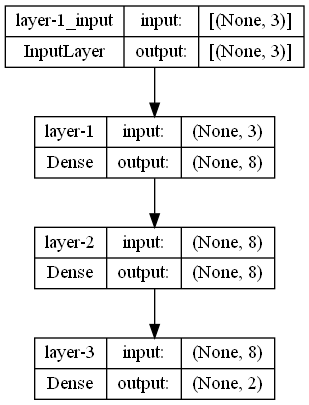

In [15]:
plot_model_better(model, show_shapes=True, show_layer_names=True)

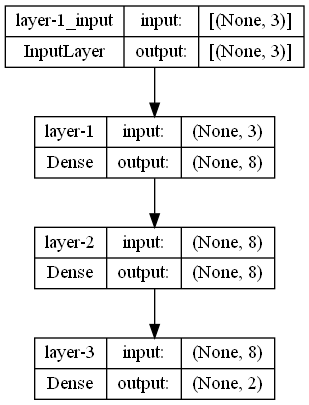

In [17]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [43]:
# `pydot` is an optional dependency,
# see `extras_require` in `setup.py`.
try:
    import pydot
except ImportError:
    pydot = None

... another example

In [33]:
model = tf.keras.Sequential([
                    tf.keras.layers.Dense(32, input_dim=784), 
                    tf.keras.layers.Activation('relu'),
                    tf.keras.layers.Dense(10),
                    tf.keras.layers.Activation('softmax')
])

##### Specifying the `input shape`
- The model needs to know what `input shape` it should expect. 
- For this reason, the first layer in a Sequential model (and only the first, because following layers can do automatic shape inference) needs to receive information about its input shape. 

- There are several possible ways to do this:

    - pass an `input_shape` argument to the first layer. 
        - This is a shape tuple (a tuple of integers or None entries, where None indicates that any positive integer may be expected). 
        - In input_shape, the batch dimension is not included.
    - pass instead a `batch_input_shape` argument, where the batch dimension is included. 
        - This is useful for specifying a fixed batch size (e.g. with stateful RNNs).
    - some 2D layers, such as Dense, support the specification of their input shape via the argument `input_dim`, and 
    - some 3D temporal layers support the arguments `input_dim` and `input_length`.

In [43]:
# option 1
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(5, 
                                input_shape=(784,)
                               )
         )

In [49]:
gen = tf.random.Generator.from_seed(1)
x   = gen.normal(shape=[2, 784])

model(x)

<tf.Tensor: shape=(2, 5), dtype=float32, numpy=
array([[-0.02698779, -0.26033413, -0.6672318 , -3.0363643 , -0.99552524],
       [-0.3309524 ,  3.0101492 ,  0.8995177 , -2.1724281 ,  3.478689  ]],
      dtype=float32)>

In [60]:
# option 2
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(3, 
                                batch_input_shape=(None, 784)))
# note that batch dimension is "None" here,
# so the model will be able to process batches of any size.

In [61]:
gen = tf.random.Generator.from_seed(1)
x   = gen.normal(shape=[2, 784])

model(x)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 0.7393788 ,  1.4655681 , -0.40895665],
       [ 0.3150465 , -0.7034733 , -0.7806533 ]], dtype=float32)>

In [62]:
# option 3
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(3, 
                                input_dim=784))

In [63]:
gen = tf.random.Generator.from_seed(1)
x   = gen.normal(shape=[2, 784])

model(x)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[-1.053868  , -0.3431899 , -1.8172685 ],
       [-0.2823447 , -0.40520525,  0.63685244]], dtype=float32)>

#### method 2

In [44]:
layer1 = layers.Dense(2, activation="relu", name="layer-1")
layer2 = layers.Dense(3, activation="relu", name="layer-2")
layer3 = layers.Dense(4, name="layer-3")

# Call layers on a test input
x = tf.ones((3, 3))
y = layer3(layer2(layer1(x)))

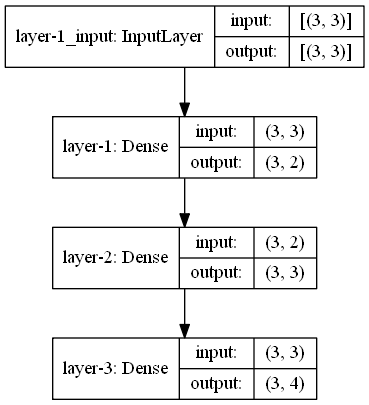

In [45]:
plot_model(model, show_shapes=True, show_layer_names=True)

#### method 3 : You can also create a Sequential model incrementally via the add() method:

In [46]:
model = keras.Sequential()
model.add(layers.Dense(2, activation="relu", name="layer-1"))
model.add(layers.Dense(3, activation="relu", name="layer-2"))
model.add(layers.Dense(4, name="layer-3"))

there's also a corresponding pop() method to remove layers: a Sequential model behaves very much like a list of layers.

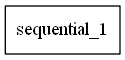

In [47]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [48]:
model.pop()
print(len(model.layers))  

2


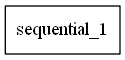

In [49]:
plot_model(model, show_shapes=True, show_layer_names=True)

## Specifying the input shape

Generally, all layers in Keras need to know the shape of their inputs in order to be able to create their weights. So when you create a layer like this, initially, it has no weights:

In [50]:
layer = layers.Dense(2, activation="relu", name="layer-1")
layer.weights  # Empty

[]

It creates its weights the first time it is called on an input, since the shape of the weights depends on the shape of the inputs:

In [51]:
# Call layer on a test input
x = tf.ones((1, 4))

y = layer(x)

layer.weights  # Now it has weights, of shape (4, 3) and (3,)

[<tf.Variable 'layer-1/kernel:0' shape=(4, 2) dtype=float32, numpy=
 array([[ 0.76888967, -0.68342924],
        [-0.5972409 , -0.9019871 ],
        [ 0.89623904, -0.12744975],
        [ 0.15753269, -0.542155  ]], dtype=float32)>,
 <tf.Variable 'layer-1/bias:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>]

Similarly

When you instantiate a Sequential model without an input shape, it isn't "built": it has __no weights__ (and calling __model.weights__ results in an error stating just this). 

The weights are created when the model first sees some input data:

In [52]:
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu"),
        layers.Dense(3, activation="relu"),
        layers.Dense(4),
    ]
)  # No weights at this stage!

In [53]:
# At this point, you can't do this:
#model.weights

In [54]:
# You also can't do this:
# model.summary()

In [55]:
# Call the model on a test input
x = tf.ones((1, 4))
y = model(x)
print("Number of weights after calling the model:", len(model.weights))  # 6

Number of weights after calling the model: 6


In [56]:
model.weights

[<tf.Variable 'dense_3/kernel:0' shape=(4, 2) dtype=float32, numpy=
 array([[-0.00351381, -0.05049205],
        [-0.43141246, -0.5448258 ],
        [ 0.59228015,  0.6336372 ],
        [-0.76355815, -0.88048744]], dtype=float32)>,
 <tf.Variable 'dense_3/bias:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>,
 <tf.Variable 'dense_4/kernel:0' shape=(2, 3) dtype=float32, numpy=
 array([[-0.45862055, -1.0813391 , -0.52463186],
        [-0.27406865, -0.46602017, -0.73088396]], dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_5/kernel:0' shape=(3, 4) dtype=float32, numpy=
 array([[-0.62344384,  0.7781285 ,  0.05051112, -0.00783181],
        [ 0.84223795, -0.46918967, -0.85226625, -0.788989  ],
        [ 0.2759899 ,  0.31866956, -0.547767  , -0.6739261 ]],
       dtype=float32)>,
 <tf.Variable 'dense_5/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>]

In [57]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (1, 2)                    10        
_________________________________________________________________
dense_4 (Dense)              (1, 3)                    9         
_________________________________________________________________
dense_5 (Dense)              (1, 4)                    16        
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


 it can be very useful when building a Sequential model incrementally to be able to display the summary of the model so far, including the current output shape. 
 
 In this case, you should start your model by passing an Input object to your model, so that it knows its input shape from the start:

In [58]:
model = keras.Sequential()
model.add(keras.Input(shape=(4,)))
model.add(layers.Dense(2, activation="relu"))
model.add(layers.Dense(2, activation="relu"))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 6         
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


Input object is not displayed as part of model.layers, since it isn't a layer:

In [59]:
model.layers

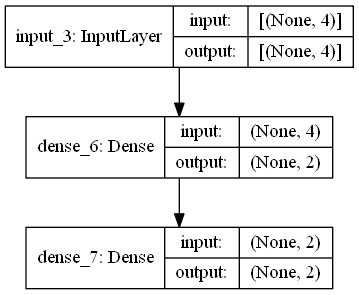

In [60]:
plot_model_better(model, show_shapes=True, show_layer_names=True)

A simple alternative is to just pass an input_shape argument to your first layer:

In [61]:
model = keras.Sequential()
model.add(layers.Dense(4, activation="relu", input_shape=(4,)))
model.add(layers.Dense(2, activation="relu"))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 10        
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


Models built with a predefined input shape like this always have weights (even before seeing any data) and always have a defined output shape.

In general, it's a recommended best practice to always specify the input shape of a Sequential model in advance if you know what it is.

#### What to do once you have a model

Once your model architecture is ready, you will want to:

- Train your model, 
- evaluate it, and 
- run inference. 
- Save your model to disk and restore it. 
- Speed up model training by leveraging multiple GPUs. 